In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
sens_rn222_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_rn222.csv',\
                                        delimiter=',',\
                                        skip_header=1)
sens_xe137_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_xe137.csv',\
                                        delimiter=',',\
                                        skip_header=1)
sens_gamma_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_gammabkgs.csv',\
                                        delimiter=',',\
                                        skip_header=1)
dp_gamma_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_gamma.csv',\
                                       delimiter=',',\
                                       skip_header=1)
dp_rn222_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_rn222.csv',\
                                       delimiter=',',\
                                       skip_header=1)
dp_xe137_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_xe137.csv',\
                                       delimiter=',',\
                                       skip_header=1)

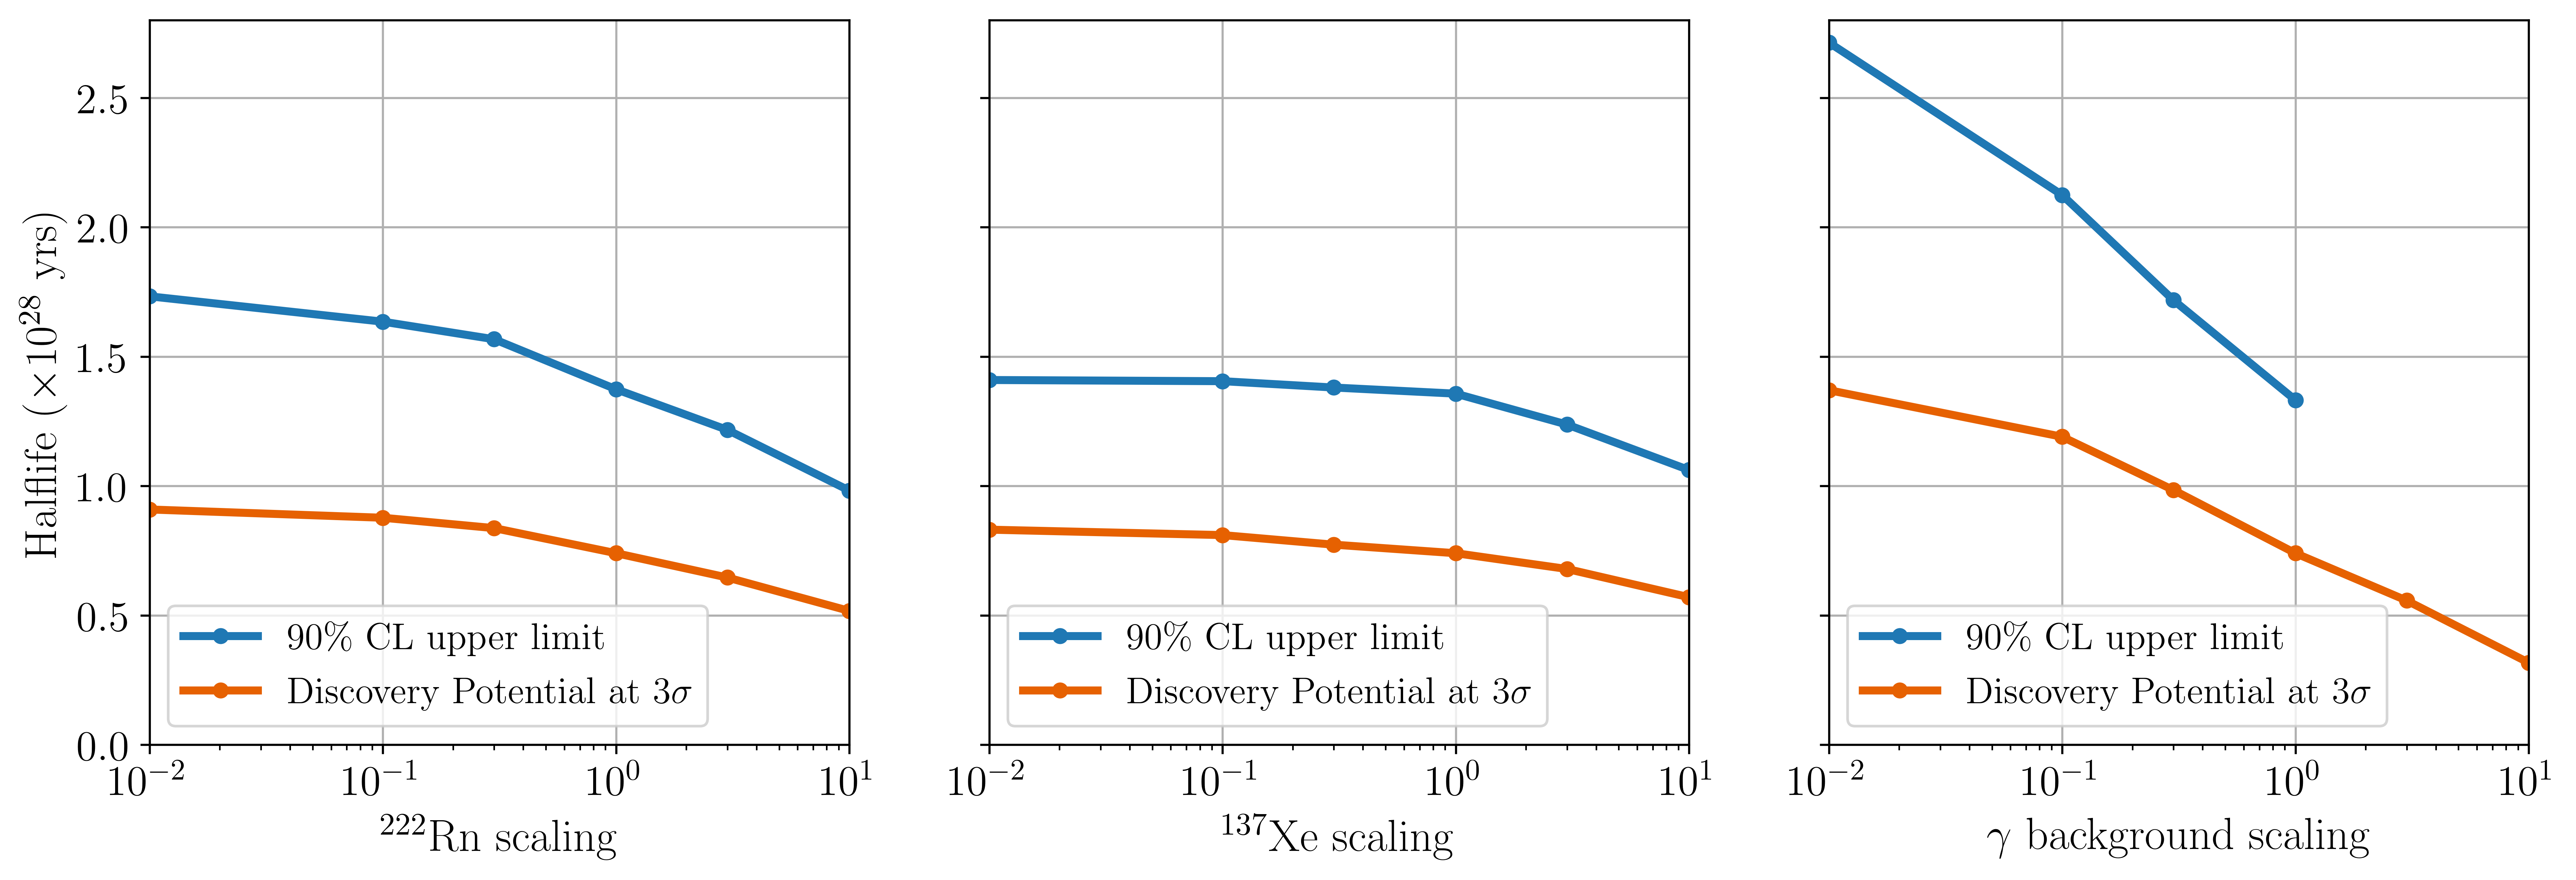

In [33]:
fig, ax = plt.subplots(figsize=(16,5), ncols=3,nrows=1,sharey=True)

# First panel: Rn222 scaling
ax[0].plot(sens_rn222_scaling_d024[:,0],sens_rn222_scaling_d024[:,1],\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[0].plot(dp_rn222_scaling_d024[:,0],dp_rn222_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$^{222}$Rn scaling')
ax[0].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[0].set_ylim(0.,2.0)
ax[0].legend(loc='lower left',fontsize=14)
ax[0].set_xlim(0.01,10.)
ax[0].grid()


# Second panel: Xe137 scaling
ax[1].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[1].plot(dp_xe137_scaling_d024[:-1,0],dp_xe137_scaling_d024[:-1,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('$^{137}$Xe scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[1].set_ylim(0.,1.6)
ax[1].set_xlim(0.01,10.)
ax[1].legend(loc='lower left',fontsize=14)
ax[1].grid()


# Third panel: gamma scaling
ax[2].plot(sens_gamma_scaling_d024[:,0],sens_gamma_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])

ax[2].plot(dp_gamma_scaling_d024[:,0],dp_gamma_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[2].set_xscale('log')
ax[2].set_xlabel('$\gamma$ background scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[2].set_ylim(0.,2.8)
ax[2].set_xlim(0.01,10.)
ax[2].legend(loc='lower left',fontsize=14)
ax[2].grid()

plt.savefig('sensitivity_vs_background_scaling.png')

[0.000206 0.000207 0.000208 0.000212 0.000224 0.000266] [0.831 0.81  0.773 0.74  0.679 0.57 ]


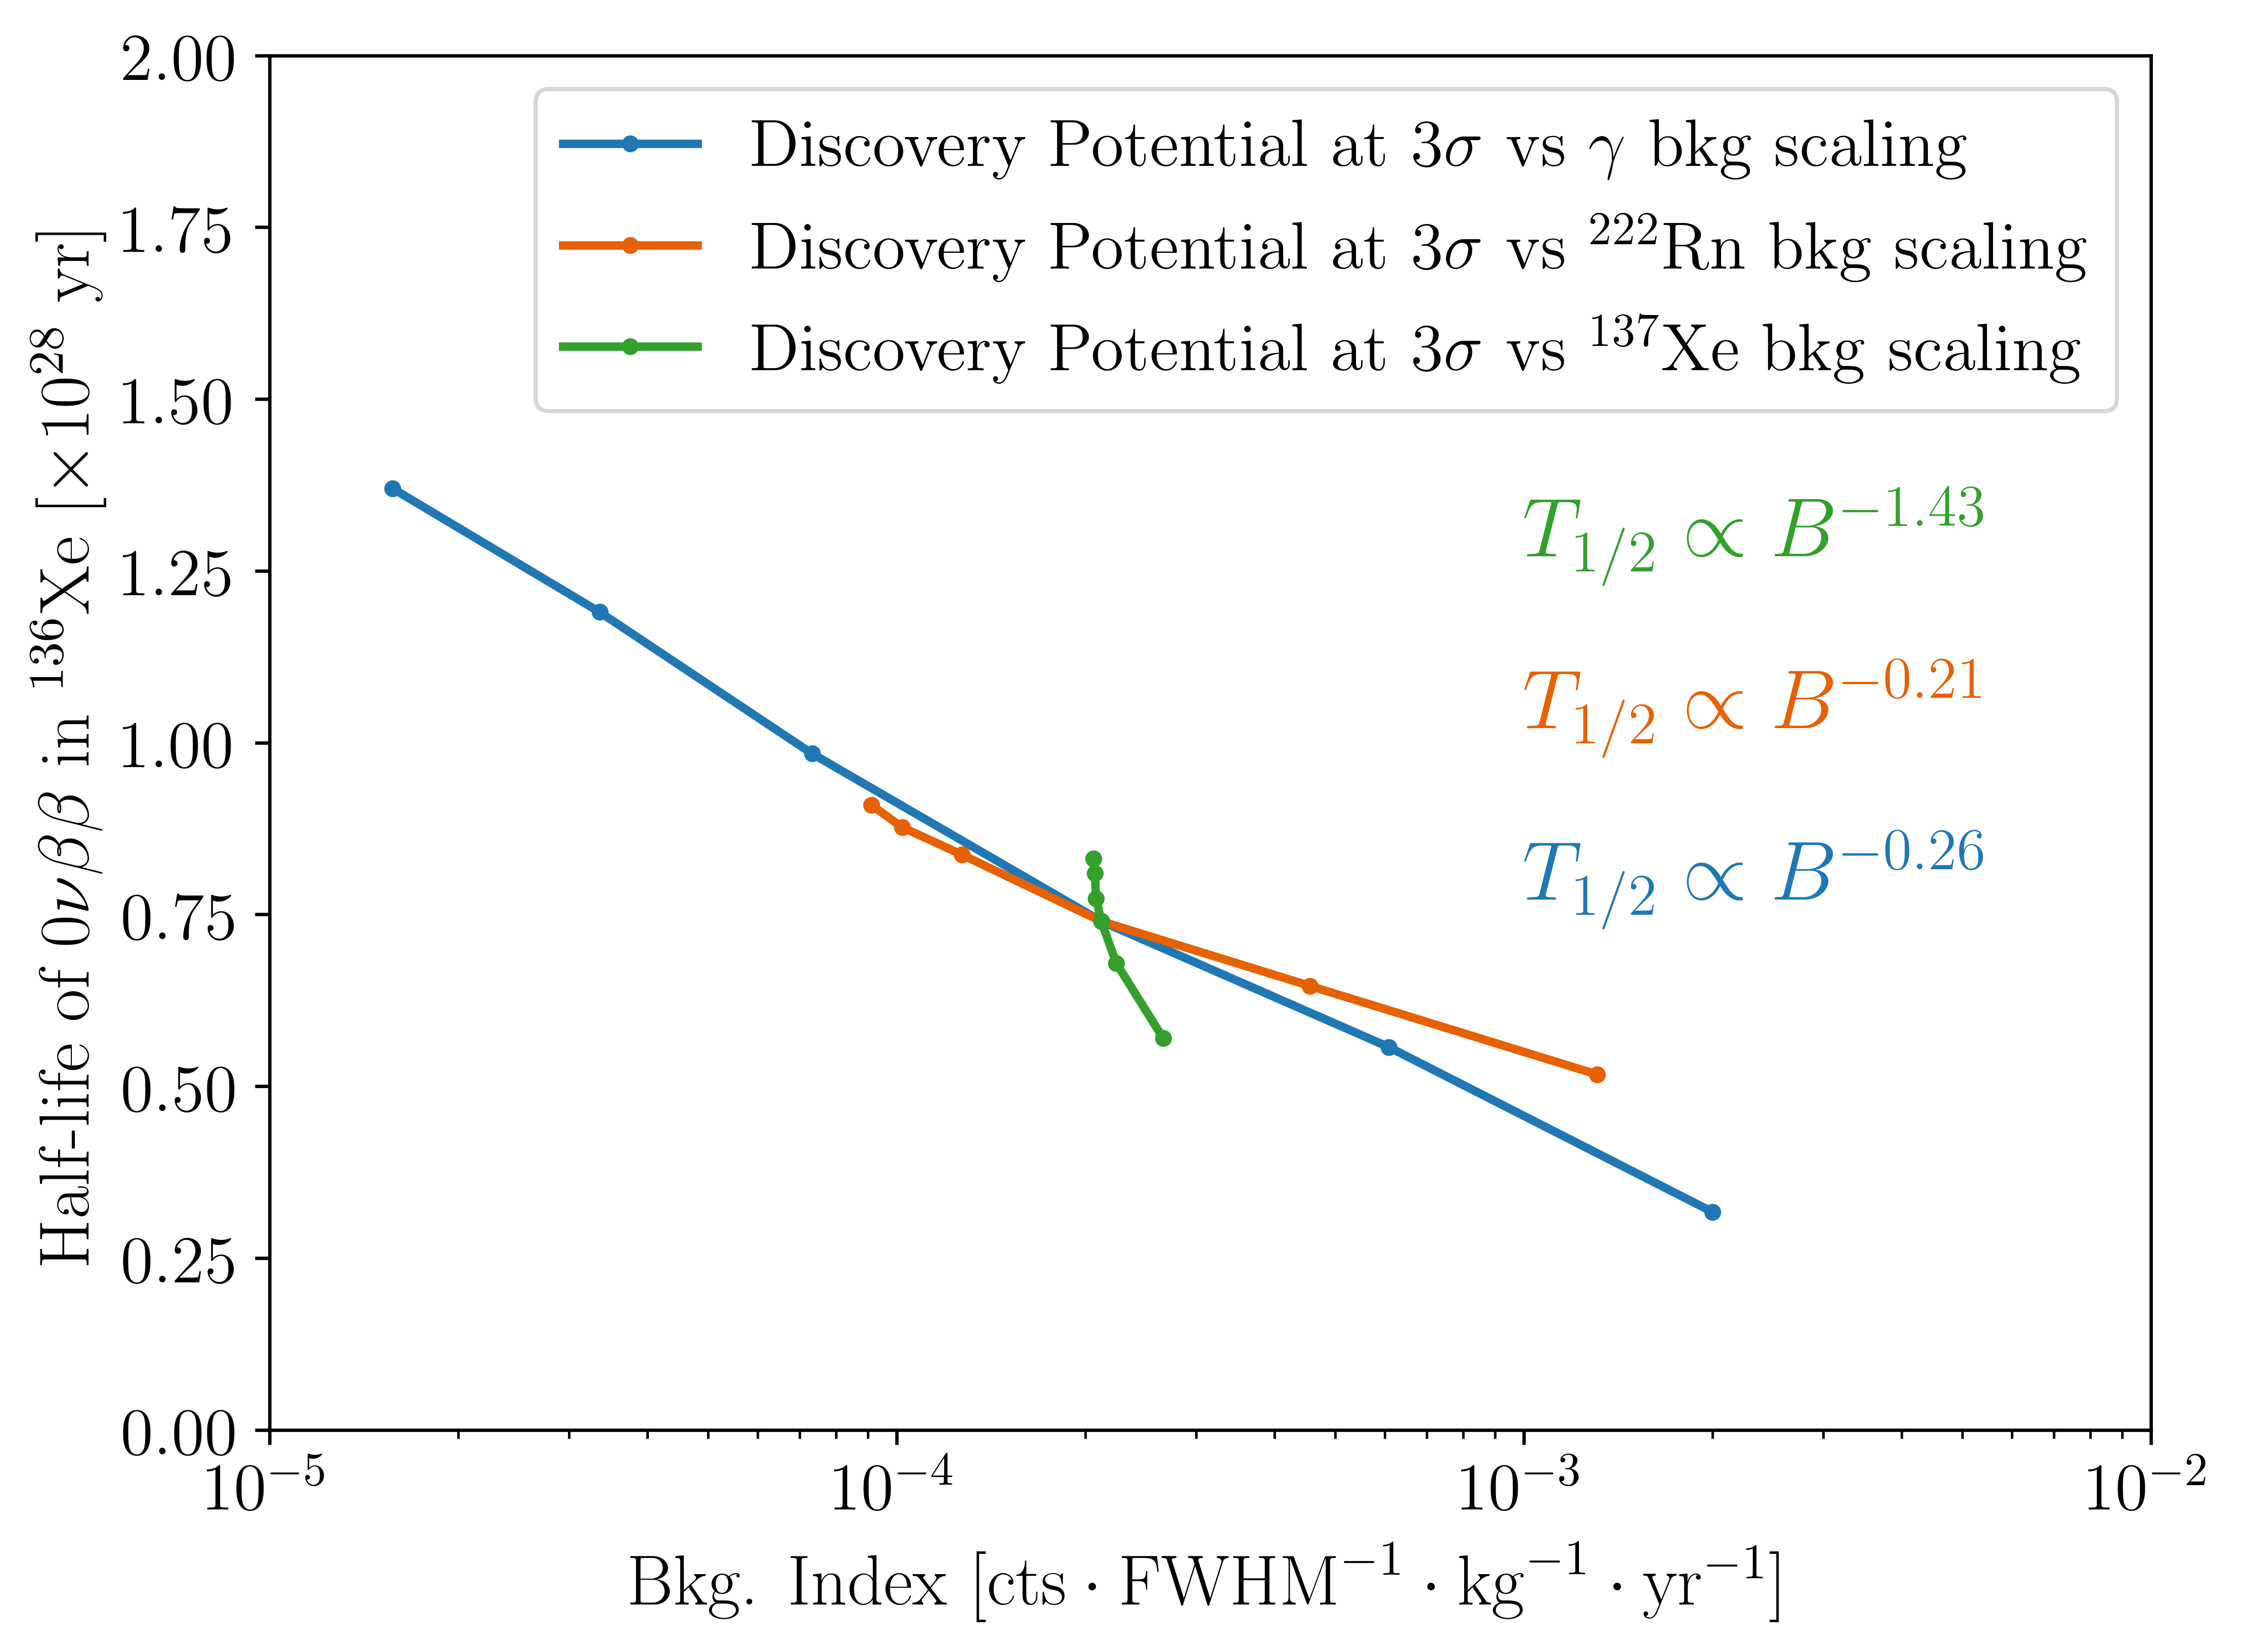

In [28]:
from scipy.optimize import curve_fit
def polyfit(x,a,b):
    return a*x**b

popt, pcov = curve_fit(polyfit, dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, p0=[1,-1])
popt2, pcov2 = curve_fit(polyfit, dp_rn222_scaling_d024[:,2], dp_rn222_scaling_d024[:,1]/1e28, p0=[1,-1])
popt3, pcov3 = curve_fit(polyfit, dp_xe137_scaling_d024[:-1,2], dp_xe137_scaling_d024[:-1,1]/1e28, p0=[1,-0.5])

print(dp_xe137_scaling_d024[:-1,2], dp_xe137_scaling_d024[:-1,1]/1e28)


xfit = np.linspace(dp_gamma_scaling_d024[0,2], dp_gamma_scaling_d024[-1,2], 100)
xfit2 = np.linspace(dp_rn222_scaling_d024[0,2], dp_rn222_scaling_d024[-1,2], 100)
xfit3 = np.linspace(dp_xe137_scaling_d024[0,2], dp_xe137_scaling_d024[-2,2], 100)


plt.figure()

plt.plot(dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, '-o',
            label='Discovery Potential at $3\sigma$ vs $\gamma$ bkg scaling', color=colors[0], ms=3)
# plt.plot(xfit,polyfit(xfit, *popt), color=colors[0], lw=3)


plt.plot(dp_rn222_scaling_d024[:,2], dp_rn222_scaling_d024[:,1]/1e28, '-o',
            label='Discovery Potential at $3\sigma$ vs ${}^{222}$Rn bkg scaling', color=colors[1], ms=3)
# plt.plot(xfit2,polyfit(xfit2, *popt2), color=colors[1], lw=3)


plt.plot(dp_xe137_scaling_d024[:-1,2], dp_xe137_scaling_d024[:-1,1]/1e28, '-o',
            label='Discovery Potential at $3\sigma$ vs ${}^{137}$Xe bkg scaling', color=colors[2], ms=3)
# plt.plot(xfit3,polyfit(xfit2, *popt2), color=colors[2], lw=3)



plt.text(1E-3, 0.75, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt[1]), color=colors[0], fontsize=20)
plt.text(1E-3, 1.0, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt2[1]), color=colors[1], fontsize=20)
plt.text(1E-3, 1.25, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt3[1]), color=colors[2], fontsize=20)



plt.xlabel(r'Bkg. Index [$\mathrm{cts}\cdot \mathrm{FWHM}^{-1}\cdot \mathrm{kg}^{-1} \cdot \mathrm{yr}^{-1}$]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [$\\times 10^{28}$ yr]')
plt.xscale('log')
plt.ylim(0,2)
plt.legend(loc='upper right')
plt.savefig('dp_vs_bkg_index.png')

In [32]:
print(sens_gamma_scaling_d024)
print(dp_gamma_scaling_d024)




[[1.00000000e-03 3.06676419e+28]
 [1.00000000e-02 2.71327424e+28]
 [1.00000000e-01 2.12429520e+28]
 [3.00000000e-01 1.71787185e+28]
 [1.00000000e+00 1.33174469e+28]]
[[1.00e-02 1.37e+28 1.57e-05]
 [1.00e-01 1.19e+28 3.36e-05]
 [3.00e-01 9.84e+27 7.33e-05]
 [1.00e+00 7.40e+27 2.12e-04]
 [3.00e+00 5.57e+27 6.09e-04]
 [1.00e+01 3.17e+27 2.00e-03]]


In [29]:
from scipy.optimize import curve_fit
def polyfit(x,a,b):
    return a*x**b

popt, pcov = curve_fit(polyfit, dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, p0=[1,-1])
popt2, pcov2 = curve_fit(polyfit, sens_gamma_scaling_d024[:,2], sens_gamma_scaling_d024[:,1]/1e28, p0=[1,-1])


xfit = np.linspace(dp_gamma_scaling_d024[0,2], dp_gamma_scaling_d024[-1,2], 100)



plt.figure()

plt.plot(dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, '-o',
            label='Discovery Potential at $3\sigma$', color=colors[0], ms=3)
# plt.plot(xfit,polyfit(xfit, *popt), color=colors[0], lw=3)
plt.plot(dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, '-o',
            label='Sensitivity at 90\%CL', color=colors[1], ms=3)
# plt.plot(xfit,polyfit(xfit, *popt), color=colors[0], lw=3)



plt.text(1E-3, 0.75, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt[1]), color=colors[0], fontsize=20)
plt.text(1E-3, 1.0, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt2[1]), color=colors[1], fontsize=20)
#plt.text(1E-3, 1.25, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt3[1]), color=colors[2], fontsize=20)



plt.xlabel(r'Bkg. Index [$\mathrm{cts}\cdot \mathrm{FWHM}^{-1}\cdot \mathrm{kg}^{-1} \cdot \mathrm{yr}^{-1}$]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [$\\times 10^{28}$ yr]')
plt.xscale('log')
plt.ylim(0,2)
plt.legend(loc='upper right')
plt.savefig('dp_vs_bkg_index.png')

IndexError: index 2 is out of bounds for axis 1 with size 2

[ 8.36775772e+26 -2.58163961e-01]
[ 1.40251296e+27 -2.28198382e-01]
[ 3.23589035e+27 -2.14925607e-01]


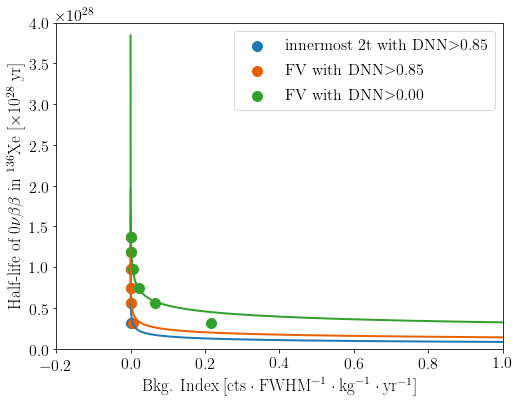

In [23]:
from scipy.optimize import curve_fit
def polyfit(x,a,b):
    return a*x**b

scale = [0.01, 0.1, 0.3, 1.0, 3.0, 10.0]
cts2tdnn085 = [1.57e-05, 3.36e-05, 7.33e-05, 0.000212, 0.000609, 0.002] 
ctsfvdnn085 = [2.03e-05, 8.09e-05, 0.000216, 0.000687, 0.00203, 0.00675] 

ctsfvdnn000 = [0.000239, 0.00218, 0.0065, 0.0216, 0.0648, 0.216] 
halflife = [1.37e+28,1.19e+28,9.84e+27,7.5e+27,5.57e+27,3.17e+27]

popt, pcov = curve_fit(polyfit, cts2tdnn085[1:-1], halflife[1:-1], p0=[1E28,-0.1])
popt2, pcov2 = curve_fit(polyfit, ctsfvdnn085[1:-1], halflife[1:-1], p0=[1E28,-0.1])
popt3, pcov3 = curve_fit(polyfit, ctsfvdnn000[1:-1], halflife[1:-1], p0=[1E28,-0.1])
xfit = np.linspace(1e-5, 1e0, 100000)




print(popt)
print(popt2)
print(popt3)

plt.figure(figsize=(8,6))
plt.xlabel(r'Bkg. Index [$\mathrm{cts}\cdot \mathrm{FWHM}^{-1}\cdot \mathrm{kg}^{-1} \cdot \mathrm{yr}^{-1}$]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [$\\times 10^{28}$ yr]')

plt.scatter(cts2tdnn085,halflife, label='innermost 2t with DNN$>$0.85')
plt.scatter(ctsfvdnn085,halflife, label='FV with DNN$>$0.85')
plt.scatter(ctsfvdnn000,halflife, label='FV with DNN$>$0.00')
plt.plot(xfit,polyfit(xfit, *popt))
plt.plot(xfit,polyfit(xfit, *popt2))
plt.plot(xfit,polyfit(xfit, *popt3))
# plt.xscale('log')
plt.legend(loc='upper right')
plt.savefig('halflife_vs_bkg.png')

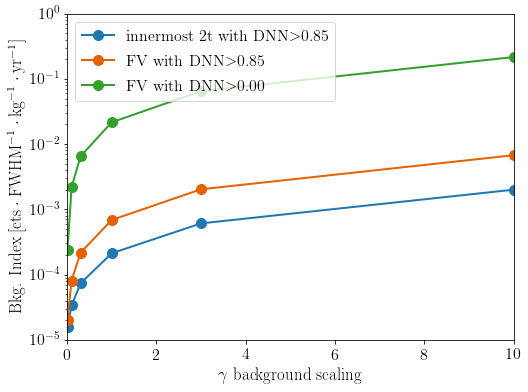

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('$\gamma$ background scaling')

plt.ylabel(r'Bkg. Index [$\mathrm{cts}\cdot \mathrm{FWHM}^{-1}\cdot \mathrm{kg}^{-1} \cdot \mathrm{yr}^{-1}$]')

plt.plot(scale, cts2tdnn085, label='innermost 2t with DNN$>$0.85', marker='o')
plt.plot(scale, ctsfvdnn085, label='FV with DNN$>$0.85', marker='o')
plt.plot(scale, ctsfvdnn000, label='FV with DNN$>$0.00', marker='o')
# plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.savefig('bkg_vs_scaling.png')

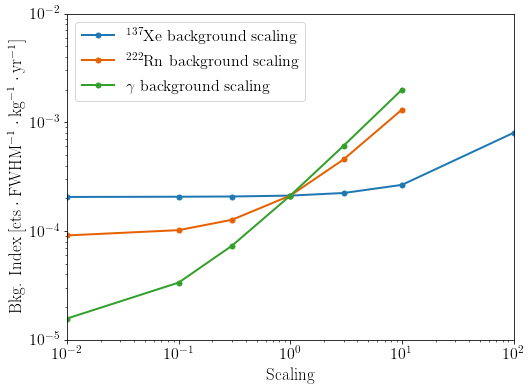

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel('Scaling')
plt.ylabel(r'Bkg. Index [$\mathrm{cts}\cdot \mathrm{FWHM}^{-1}\cdot \mathrm{kg}^{-1} \cdot \mathrm{yr}^{-1}$]')

scale = [0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 100.0]
plt.plot(scale, dp_xe137_scaling_d024[:,2], label='${}^{137}$Xe background scaling', marker='.')
plt.plot(scale[:-1], dp_rn222_scaling_d024[:,2], label='${}^{222}$Rn background scaling', marker='.')
plt.plot(scale[:-1], dp_gamma_scaling_d024[:,2], label='$\gamma$ background scaling', marker='.')


plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.savefig('bkg_vs_different_scaling.png')